# **Code**

##**Part1: Influence of Regularization**

In [2]:
# Enable GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [42]:
# Import the CIFAR10 Image dataset from the Keras module
from keras.datasets import cifar10
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Check the shape of the in-built training data
# 50,000 images in training dataset of size 32*32 with 3 channels (R-G-B)
# CIFAR10 is a preprocessed dataset.
X_train.shape

(50000, 32, 32, 3)

In [43]:
# Splitting X_train into training and validation dataset
x_train = X_train[0 : 40000]
y_train = Y_train[0 : 40000]
x_val = X_train[40000 : ]
y_val = Y_train[40000 : ]

# x_train shape -> (40000, 32, 32, 3)
x_train.shape

(40000, 32, 32, 3)

In [5]:
# x_val shape -> (10000 32, 32, 3)
x_val.shape

(10000, 32, 32, 3)

In [6]:
print(y_train[0])
print(y_train.shape)
print(y_val.shape)
x_train.shape[0]

[6]
(40000, 1)
(10000, 1)


40000

In [44]:
from tensorflow.keras.utils import to_categorical

y_train_final = to_categorical(y_train)
Y_train = to_categorical(Y_train)
y_val_final = to_categorical(y_val)
y_test_final = to_categorical(y_test)

print(y_val[0])
print(y_val_final[0])
print(y_val_final.shape)
print(y_val.shape)

[1]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(10000, 10)
(10000, 1)


In [36]:
print(Y_train[0])
print(y_test[0])
print(y_test_final[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
from tensorflow.python.keras.backend import conv2d
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, MaxPool2D, Conv2D
from matplotlib import pyplot as plt 

In [15]:
# Model 1 - Base model 1 - No Regularization (conv-pool-conv-pool-FC-outputFC)

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_base_model_1 = model.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

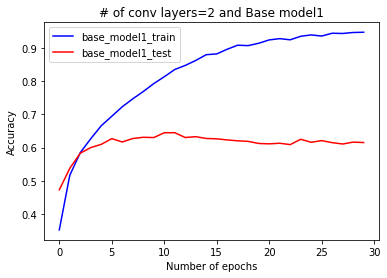

In [24]:
# Plot Learning Curve 1 (accuracy vs training iterations) for -> Base_model1 

plt.plot(trained_base_model_1.history["accuracy"], color = 'blue', label = 'base_model1_train')
plt.plot(trained_base_model_1.history["val_accuracy"], color = 'red', label = 'base_model1_test')

plt.title("# of conv layers=2 and Base model1")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()


In [1]:
# Model 1 - Base model 1 - No Regularization (conv-pool-conv-pool-FC-outputFC)

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])


model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_base_model_1 = model1.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

NameError: ignored

In [14]:
# Model 2 - Adding L2 regularization (weight decay) to trained_model1 
from keras import regularizers

model1 = Sequential()

model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3), kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model1_l2 = model1.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

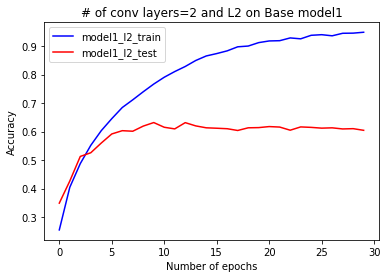

In [23]:
# Plot Learning Curve 2 (accuracy vs training iterations) for -> Add L2 regularization on Base model 1 

plt.plot(trained_model1_l2.history["accuracy"], color = 'blue', label = 'model1_l2_train')
plt.plot(trained_model1_l2.history["val_accuracy"], color = 'red', label = 'model1_l2_test')

plt.title("# of conv layers=2 and L2 on Base model1")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [17]:
# Model3 - Adding Dropout to trained_model1
from tensorflow.keras.layers import Dropout

model1 = Sequential()

model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3), kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.1))
model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(Dropout(0.1))
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model1_dropout = model1.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

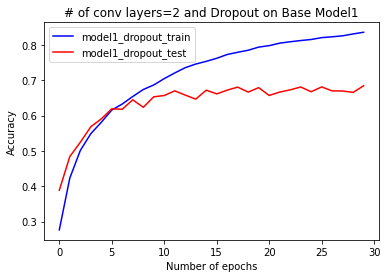

In [27]:
# Plot Learning Curve 3 (accuracy vs training iterations) for -> Add Dropout on Base Model 1 

plt.plot(trained_model1_dropout.history["accuracy"], color = 'blue', label = 'model1_dropout_train')
plt.plot(trained_model1_dropout.history["val_accuracy"], color = 'red', label = 'model1_dropout_test')

plt.title("# of conv layers=2 and Dropout on Base Model1")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [19]:
# Model 4 - Adding Batch Normalization to trained_model1
from tensorflow.keras.layers import BatchNormalization

model1 = Sequential()

model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3), kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.00001)))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model1_BN = model1.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 6, 6, 64)          256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

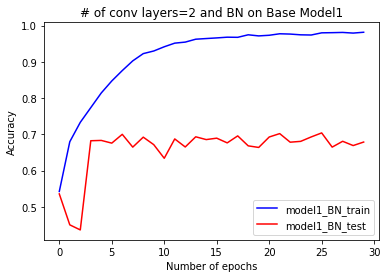

In [26]:
# Plot Learning Curve 4 (accuracy vs training iterations) for -> Add Batch Normalization on Base Model 1 

plt.plot(trained_model1_BN.history["accuracy"], color = 'blue', label = 'model1_BN_train')
plt.plot(trained_model1_BN.history["val_accuracy"], color = 'red', label = 'model1_BN_test')

plt.title("# of conv layers=2 and BN on Base Model1")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [21]:
# Model 5 - Base model 2 - No Regularization (conv1-pool-conv2-pool-conv3-pool-FC1-FC2-outputFC)

model2 = Sequential()

model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))


model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_base_model_2 = model2.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)              

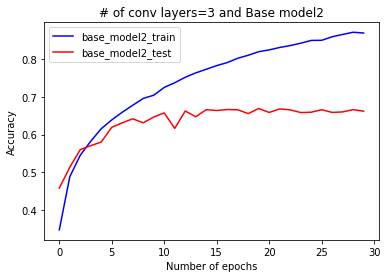

In [28]:
# Plot Learning Curve 5 (accuracy vs training iterations) for -> Base_model2

plt.plot(trained_base_model_2.history["accuracy"], color = 'blue', label = 'base_model2_train')
plt.plot(trained_base_model_2.history["val_accuracy"], color = 'red', label = 'base_model2_test')

plt.title("# of conv layers=3 and Base model2")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [29]:
# Model 6 - Adding L2 regularization to the Base model 2

from keras import regularizers

model2 = Sequential()

model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3), kernel_regularizer = regularizers.l2(0.00001)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.00001)))
model2.add(Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.00001)))
model2.add(Dense(10, activation='softmax'))


model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model2_l2 = model2.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)              

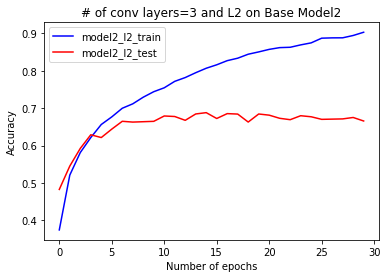

In [30]:
# Plot Learning Curve 6 (accuracy vs training iterations) for -> Add L2 on Base Model 2 

plt.plot(trained_model2_l2.history["accuracy"], color = 'blue', label = 'model2_l2_train')
plt.plot(trained_model2_l2.history["val_accuracy"], color = 'red', label = 'model2_l2_test')

plt.title("# of conv layers=3 and L2 on Base Model2")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [31]:
# Model 7 - Adding Dropout to Base Model 2

from tensorflow.keras.layers import Dropout

model2 = Sequential()

model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(10, activation='softmax'))


model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model2_dropout = model2.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)         

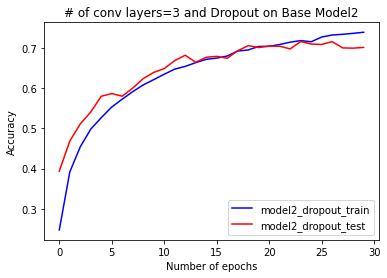

In [32]:
# Plot Learning Curve 7 (accuracy vs training iterations) for -> Add Dropout on Base Model 2 

plt.plot(trained_model2_dropout.history["accuracy"], color = 'blue', label = 'model2_dropout_train')
plt.plot(trained_model2_dropout.history["val_accuracy"], color = 'red', label = 'model2_dropout_test')

plt.title("# of conv layers=3 and Dropout on Base Model2")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [33]:
# Model 8 - Adding Batch Normalization to Base Model 2

from tensorflow.keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(100, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))


model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
trained_model2_BN = model2.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)         

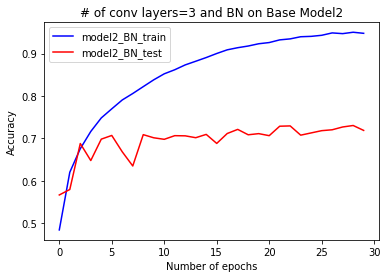

In [34]:
# Plot Learning Curve 8 (accuracy vs training iterations) for -> Add Batch Normalization on Base Model 2 

plt.plot(trained_model2_BN.history["accuracy"], color = 'blue', label = 'model2_BN_train')
plt.plot(trained_model2_BN.history["val_accuracy"], color = 'red', label = 'model2_BN_test')

plt.title("# of conv layers=3 and BN on Base Model2")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [45]:
# Final Model 1 -> Based on Model 7 - Adding Dropout to Base Model 2
# Training model on entire trining dataset and testing on test dataset (train : test => 50,000 : 10,000)

from tensorflow.keras.layers import Dropout

model3 = Sequential()

model3.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))
model3.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))
model3.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10, activation='softmax'))


model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
final_model_dropout_2 = model3.fit(X_train, Y_train, epochs = 30, batch_size = 64, validation_data = (x_test, y_test_final))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_27 (ModuleWra (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 64)        

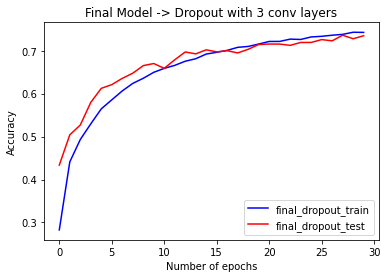

In [39]:
# final_model_dropout_2

# Plot Learning Curve 9 (accuracy vs training iterations) for -> Final Model 1 (Dropout on base2) 

plt.plot(final_model_dropout_2.history["accuracy"], color = 'blue', label = 'final_dropout_train')
plt.plot(final_model_dropout_2.history["val_accuracy"], color = 'red', label = 'final_dropout_test')

plt.title("Final Model -> Dropout with 3 conv layers")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [38]:
# Final model 2 -> Based on Model 8 - Adding Batch Normalization to Base Model 2

from tensorflow.keras.layers import BatchNormalization

model4 = Sequential()

model4.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Flatten())
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(10, activation='softmax'))


model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
final_model_BN_2 = model4.fit(X_train, Y_train, epochs = 30, batch_size = 64, validation_data = (x_test, y_test_final))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)        

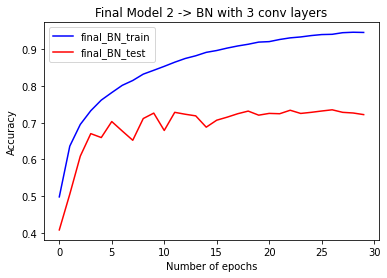

In [40]:
# final_model_BN_2

# Plot Learning Curve 10 (accuracy vs training iterations) for -> Final Model 2 - BN on Base model 2 

plt.plot(final_model_BN_2.history["accuracy"], color = 'blue', label = 'final_BN_train')
plt.plot(final_model_BN_2.history["val_accuracy"], color = 'red', label = 'final_BN_test')

plt.title("Final Model 2 -> BN with 3 conv layers")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

## **Part 2: Interpreting CNN Representations:**

In [49]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])


model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
final_model_5 = model5.fit(x_train, y_train_final, epochs = 30, batch_size = 64, validation_data = (x_val, y_val_final))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_19 (Dropout)        (None, 6, 6, 64)         

In [51]:
model5.inputs

[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_8_input')>]

In [53]:
model5.layers[0].output


<KerasTensor: shape=(None, 30, 30, 64) dtype=float32 (created by layer 'conv2d_8')>

In [77]:
y_test[0]

array([3], dtype=uint8)

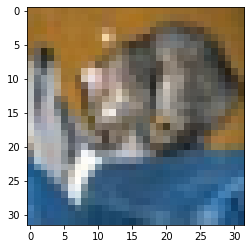

In [78]:
# Plotting the 1st image in test dataset
from matplotlib import pyplot as plt
import numpy
from PIL import Image
from urllib import request
from io import BytesIO
import matplotlib.image as mpimg

my_img = x_test[0]
plt.imshow(my_img)

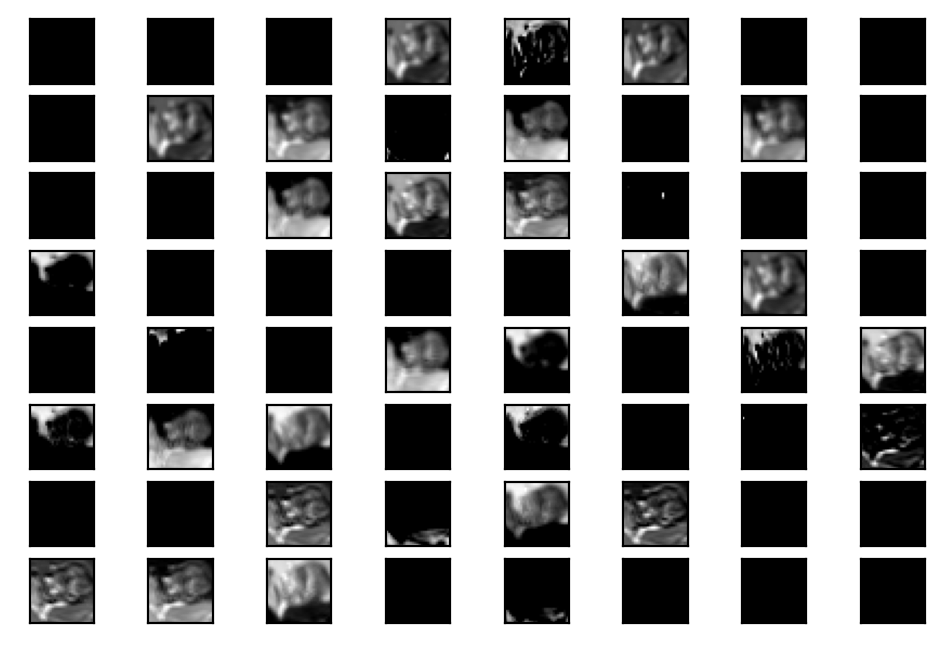

In [83]:
# Visualize the feature maps of the first conv layer from Final Model 1 - Dropout on Base model 2
# Convolution layer 1

import numpy as np
from keras.preprocessing import image
from keras.models import Model

model = Model(inputs = model5.inputs, outputs = model5.layers[0].output)

my_img = x_test[0]
img_data = image.img_to_array(my_img)
img_data = np.expand_dims(img_data, axis = 0)

feature_maps = model.predict(img_data)

square = 8
ix = 1
plt.figure(dpi = 200)
for _ in range(square):
  for _ in range(square):
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, : ,ix-1], cmap = "gray")
    ix+=1

plt.show()

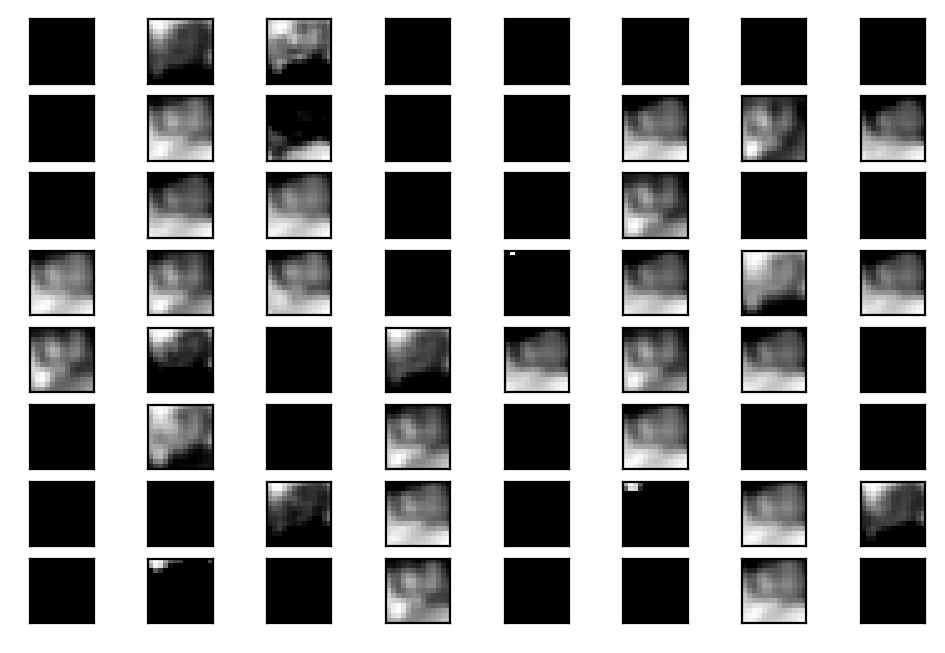

In [85]:
# Visualize the feature maps of the second conv layer from Final Model 1 - Dropout on Base model 2
# Convolution layer 2

import numpy as np
from keras.preprocessing import image
from keras.models import Model

model = Model(inputs = model5.inputs, outputs = model5.layers[3].output)

my_img = x_test[0]
img_data = image.img_to_array(my_img)
img_data = np.expand_dims(img_data, axis = 0)

feature_maps = model.predict(img_data)

square = 8
ix = 1
plt.figure(dpi = 200)
for _ in range(square):
  for _ in range(square):
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, : ,ix-1], cmap = "gray")
    ix+=1

plt.show()

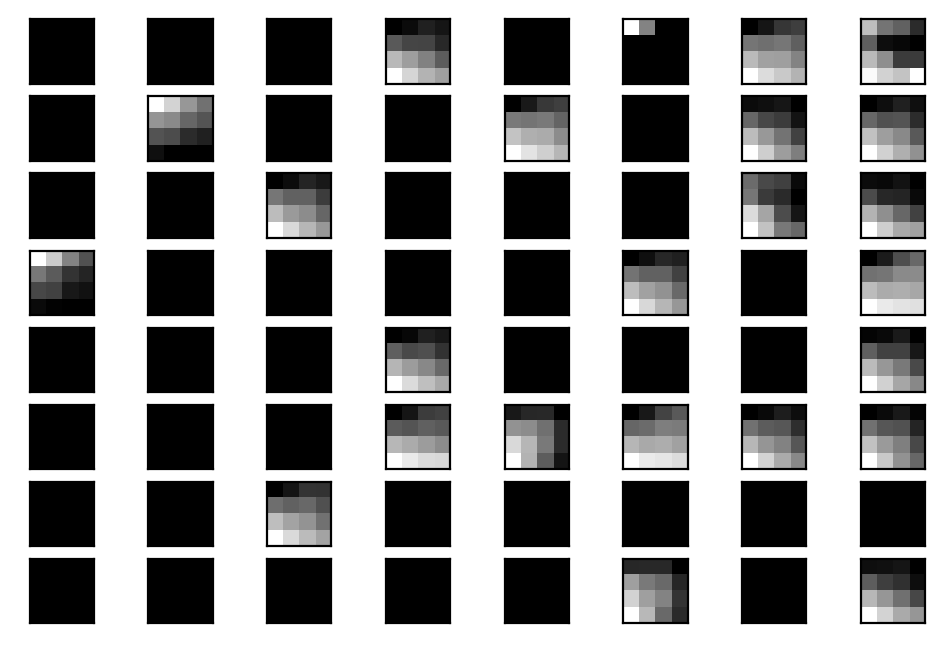

In [86]:
# Visualize the feature maps of the third conv layer from Final Model 1 - Dropout on Base model 2
# Convolution layer 3

import numpy as np
from keras.preprocessing import image
from keras.models import Model

model = Model(inputs = model5.inputs, outputs = model5.layers[6].output)

my_img = x_test[0]
img_data = image.img_to_array(my_img)
img_data = np.expand_dims(img_data, axis = 0)

feature_maps = model.predict(img_data)

square = 8
ix = 1
plt.figure(dpi = 200)
for _ in range(square):
  for _ in range(square):
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, : ,ix-1], cmap = "gray")
    ix+=1

plt.show()